# Problem Statement- Employee Absenteeism
Project Description and Problem statement -
XYZ is a courier company. As we appreciate that human capital plays an important role
in collection, transportation and delivery. The company is passing through genuine
issue of Absenteeism. The company has shared it dataset and requested to have an
answer on the following areas: What changes company should bring to reduce the number of absenteeism?

Target variable is continuous.  we will classify the target hours in bins and treat this machcine Learning problem as  classification.

     Absenteeism Time (in hours)    Output Sub-Class      Frequency
 
     More than 7                       Class 5               262
 
     Between 3 - 5                     Class 2               177
 
     Less than equal 2                 Class 1               279

In [342]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN
from sklearn.model_selection import train_test_split

# error metrics
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#ANOVA F Test

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi


import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [343]:
#Set working directory
os.chdir(r"C:\Projects")

In [344]:
# Load data and save original copy
df = pd.read_excel('Absenteeism_at_work_Project.xls')
df_original=df.copy() 

In [345]:
# get current working directory
os.getcwd()

'C:\\Projects'

# hypothesis generation


# These are some of the hypotheseis which could affect the abseentism  time:
1. Severe medical condition will lead to higher abseentism.
2. Higher transportation expense and 'distance from residence to work' will lead to higher abseentism.


# Exploratory data analysis

In [346]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [347]:
df.shape

(740, 21)

In [348]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [350]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [351]:
categorical_vars = ['id','reason_for_absence','month_of_absence','day_of_the_week',
                     'seasons','disciplinary_failure', 'education', 'son','social_drinker',
                     'social_smoker', 'pet']

In [352]:
continuous_var = ['transportation_expense','distance_from_residence_to_work', 'service_time', 'age',\
                  'work_load_average_per_day', 'hit_target','weight', 'height', 'body_mass_index',\
                  'absenteeism_time_in_hours']

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
id                                 740 non-null int64
reason_for_absence                 737 non-null float64
month_of_absence                   739 non-null float64
day_of_the_week                    740 non-null int64
seasons                            740 non-null int64
transportation_expense             733 non-null float64
distance_from_residence_to_work    737 non-null float64
service_time                       737 non-null float64
age                                737 non-null float64
work_load_average/day              730 non-null float64
hit_target                         734 non-null float64
disciplinary_failure               734 non-null float64
education                          730 non-null float64
son                                734 non-null float64
social_drinker                     737 non-null float64
social_smoker                      736 non-null float64
pet  

# Density Plot and Histogram of predictors (randon continuous variables)

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Age')]

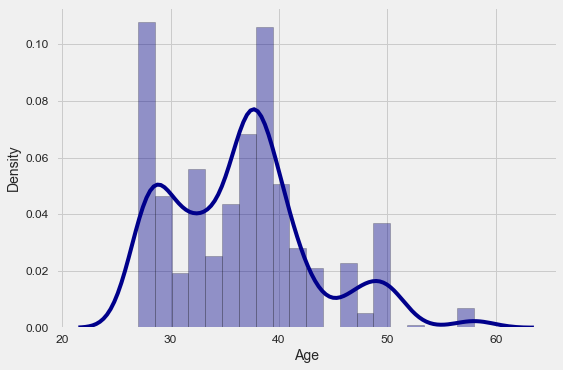

In [354]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['age'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Age', ylabel='Density')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Weight')]

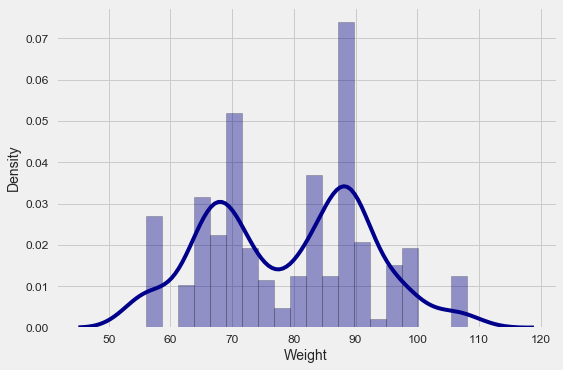

In [355]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['weight'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Weight', ylabel='Density')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Absenteeism time in hours')]

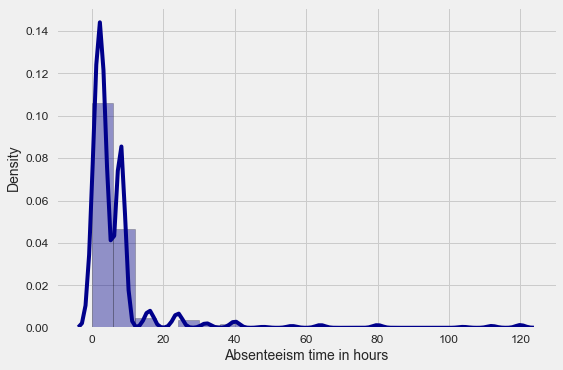

In [356]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['absenteeism_time_in_hours'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Absenteeism time in hours', ylabel='Density')

In [357]:
df.columns=df.columns.str.replace('/','Per')

In [358]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_averagePerday', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

In [359]:
df = df.rename(columns={"work_load_averagePerday": "work_load_average_per_day"})

In [360]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average_per_day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Work load Average/day')]

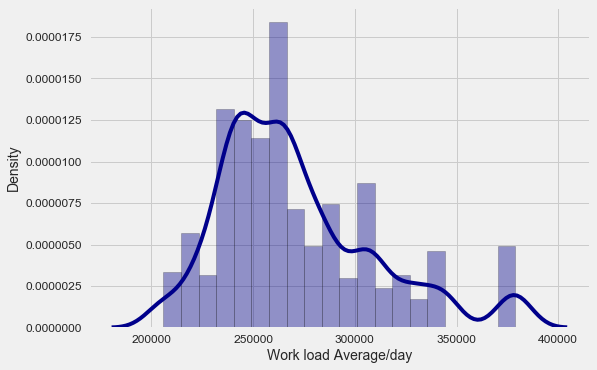

In [361]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['work_load_average_per_day'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Work load Average/day', ylabel='Density')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Distance from Residence to Work')]

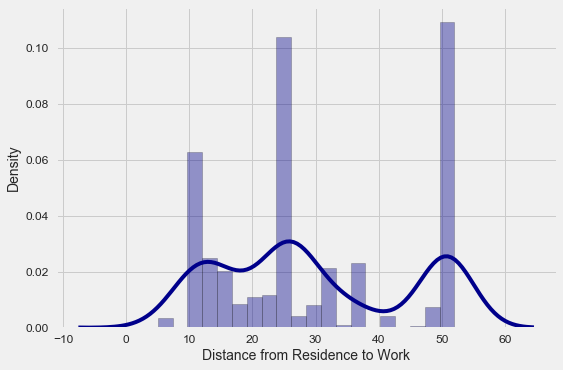

In [362]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['distance_from_residence_to_work'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Distance from Residence to Work', ylabel='Density')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'body_mass_index')]

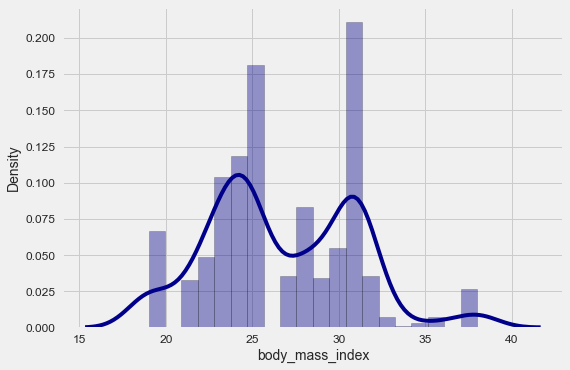

In [363]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['body_mass_index'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='body_mass_index', ylabel='Density')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Height')]

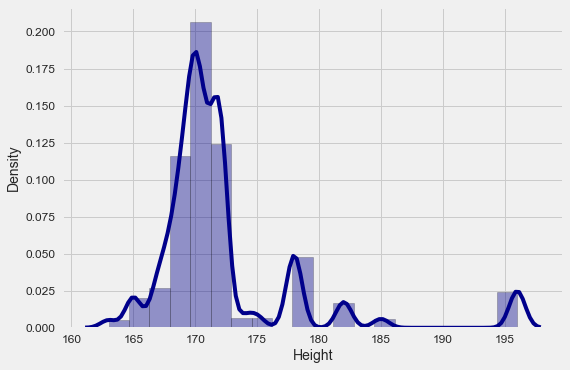

In [364]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['height'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Height', ylabel='Density')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Service time')]

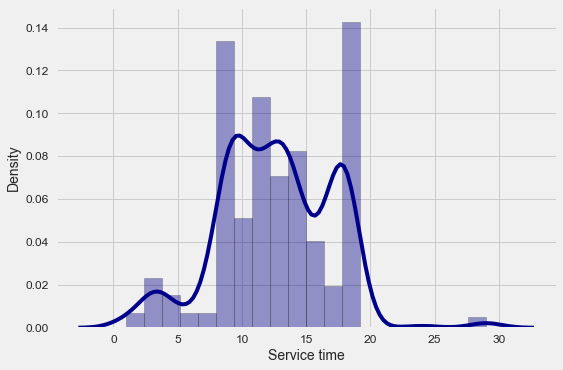

In [365]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['service_time'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Service time', ylabel='Density')

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Trnsportation expense')]

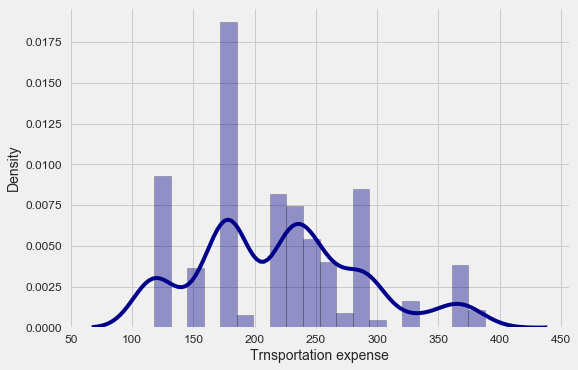

In [366]:
# Density Plot and Histogram of predictors (randon continuous variables)
ax=sns.distplot(df['transportation_expense'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='Trnsportation expense', ylabel='Density')

# EDA Bivariate Analysis

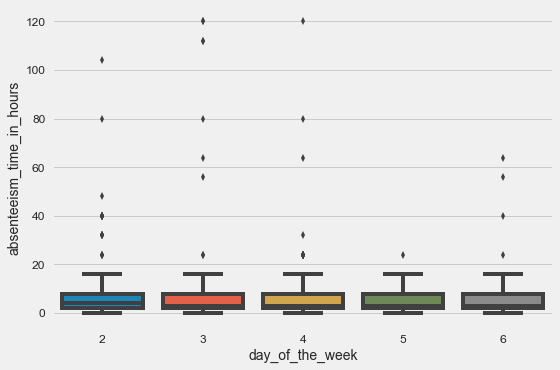

In [367]:
ax = sns.boxplot(x=df['day_of_the_week'], y=df['absenteeism_time_in_hours'], data=df)

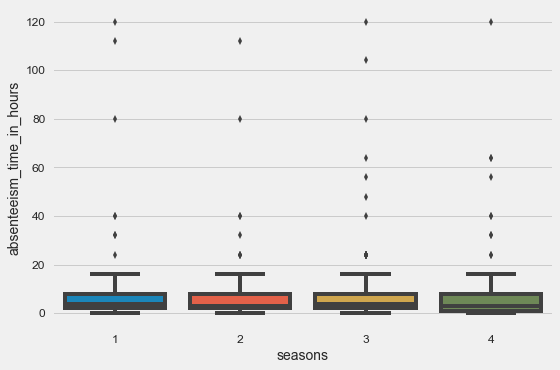

In [368]:
ax = sns.boxplot(x=df['seasons'], y=df['absenteeism_time_in_hours'], data=df)

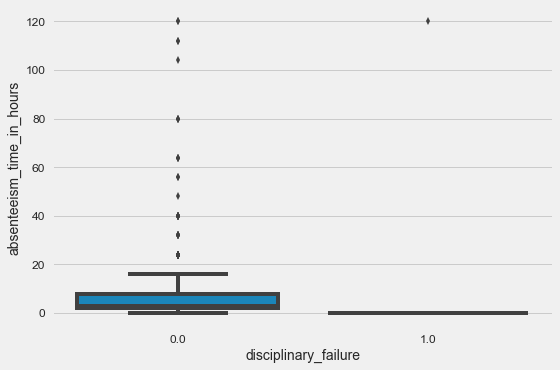

In [369]:
ax = sns.boxplot(x=df['disciplinary_failure'], y=df['absenteeism_time_in_hours'], data=df)

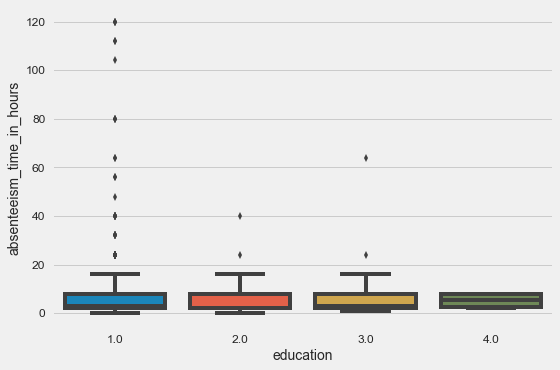

In [370]:
ax = sns.boxplot(x=df['education'], y=df['absenteeism_time_in_hours'], data=df)

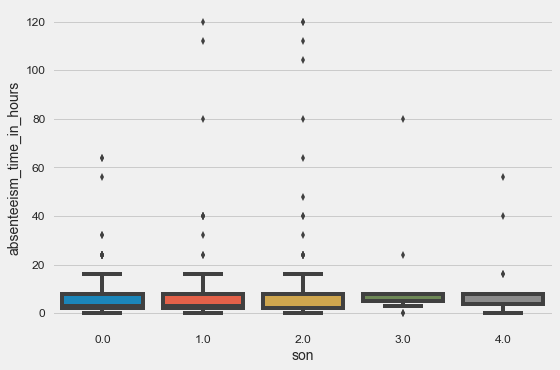

In [371]:
ax = sns.boxplot(x=df['son'], y=df['absenteeism_time_in_hours'], data=df)

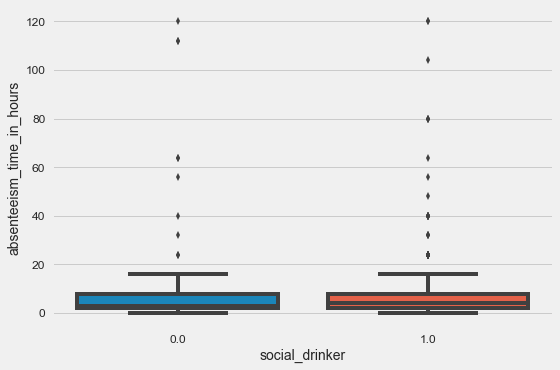

In [372]:
ax = sns.boxplot(x=df['social_drinker'], y=df['absenteeism_time_in_hours'], data=df)

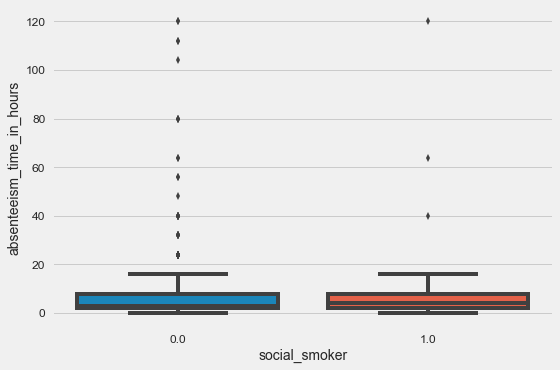

In [373]:
ax = sns.boxplot(x=df['social_smoker'], y=df['absenteeism_time_in_hours'], data=df)

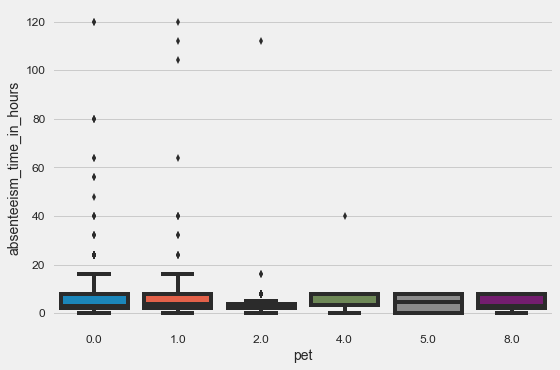

In [374]:
ax = sns.boxplot(x=df['pet'], y=df['absenteeism_time_in_hours'], data=df)

# Missing value Analysis

Text(0.5, 1.0, 'Percent missing data by feature')

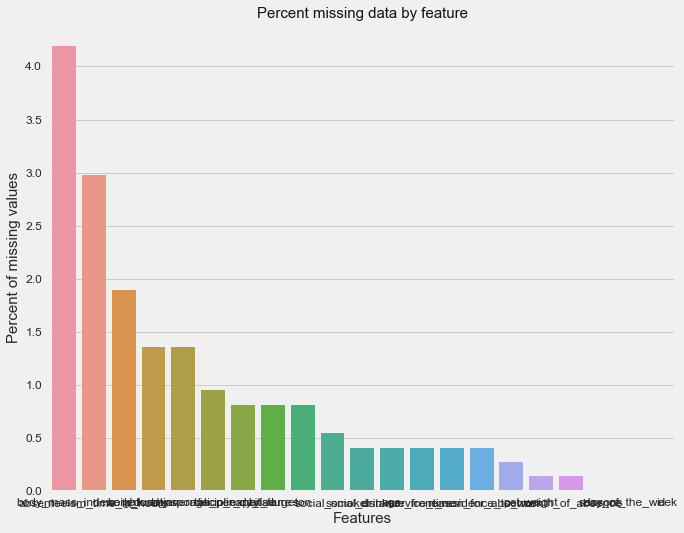

In [375]:
#Create dataframe with missing percentage
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = ((df.isnull().sum()/df.isnull().count())* 100).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [376]:
df.isnull().sum().sort_values(ascending=False)

body_mass_index                    31
absenteeism_time_in_hours          22
height                             14
education                          10
work_load_average_per_day          10
transportation_expense              7
disciplinary_failure                6
hit_target                          6
son                                 6
social_smoker                       4
social_drinker                      3
age                                 3
service_time                        3
distance_from_residence_to_work     3
reason_for_absence                  3
pet                                 2
weight                              1
month_of_absence                    1
seasons                             0
day_of_the_week                     0
id                                  0
dtype: int64

In [377]:
# Droping observation in which target "Absenteeism time in hours" has missing value
#df = df[~df['Absenteeism time in hours'].isnull()]
df = df.dropna(subset=['absenteeism_time_in_hours'])

In [378]:
df.shape

(718, 21)

In [379]:
df['body_mass_index'].iloc[30]
# 33.0 actual value
# 26.697674418604652  mean value
# 25 Median
# 27.17548948938773 kNN

33.0

In [380]:
df['body_mass_index'].iloc[30]=np.nan

In [381]:
df['body_mass_index'].iloc[30]

nan

In [382]:
df['body_mass_index'] = df['body_mass_index'].fillna(df['body_mass_index'].mean())

In [383]:
df['body_mass_index'].iloc[30]

26.697674418604652

In [384]:
df['body_mass_index'].iloc[30]=np.nan

In [385]:
df['body_mass_index'].iloc[30]

nan

In [386]:
df['body_mass_index'] = df['body_mass_index'].fillna(df['body_mass_index'].median())

In [387]:
df['body_mass_index'].iloc[30]

25.0

In [388]:
df['body_mass_index'].iloc[30]=np.nan

In [389]:
df['body_mass_index'].iloc[30]

nan

In [390]:
#Apply KNN imputation algorithm
columns=df.columns
knn = KNN(k=3)
df = knn.fit_transform(df)
df = pd.DataFrame(df,columns=columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.171
Imputing row 101/718 with 0 missing, elapsed time: 0.173
Imputing row 201/718 with 0 missing, elapsed time: 0.175
Imputing row 301/718 with 0 missing, elapsed time: 0.176
Imputing row 401/718 with 0 missing, elapsed time: 0.177
Imputing row 501/718 with 1 missing, elapsed time: 0.178
Imputing row 601/718 with 0 missing, elapsed time: 0.179
Imputing row 701/718 with 0 missing, elapsed time: 0.180


In [391]:
df['body_mass_index'].iloc[30]

27.17548948938773

In [392]:
df.isnull().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average_per_day          0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

# Outlier Analysis

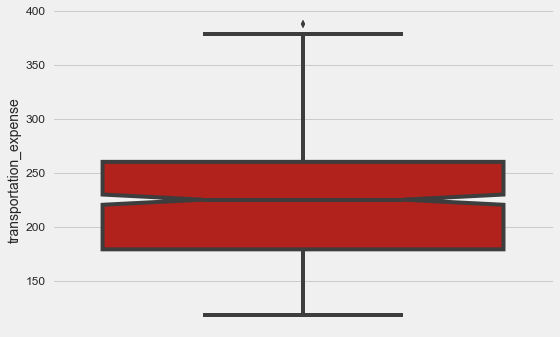

In [393]:
ax = sns.boxplot(df['transportation_expense'],orient='v',notch='True',color='r')

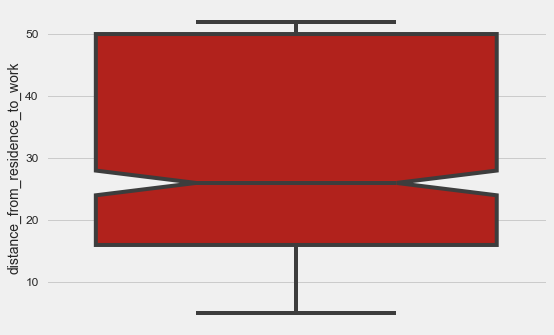

In [394]:
ax = sns.boxplot(df['distance_from_residence_to_work'],orient='v',notch='True',color='r')

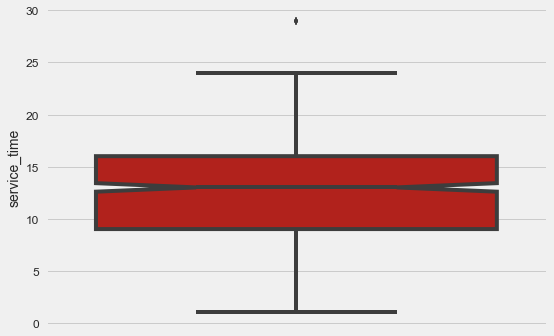

In [395]:
ax = sns.boxplot(df['service_time'],orient='v',notch='True',color='r')

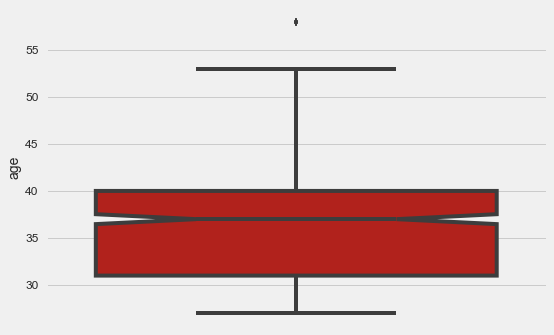

In [396]:
ax = sns.boxplot(df['age'],orient='v',notch='True',color='r')

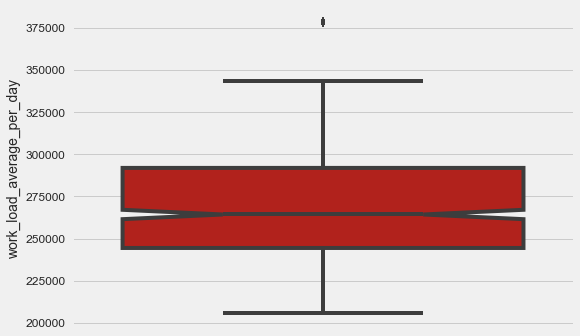

In [397]:
ax = sns.boxplot(df['work_load_average_per_day'],orient='v',notch='True',color='r')

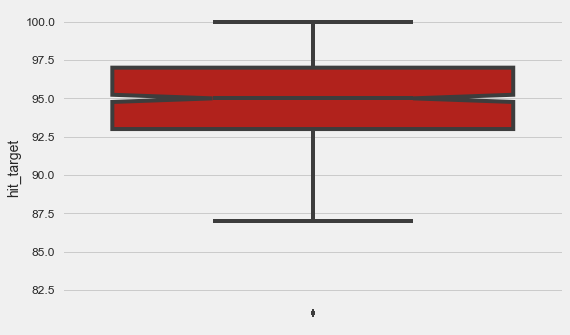

In [398]:
ax = sns.boxplot(df['hit_target'],orient='v',notch='True',color='r')

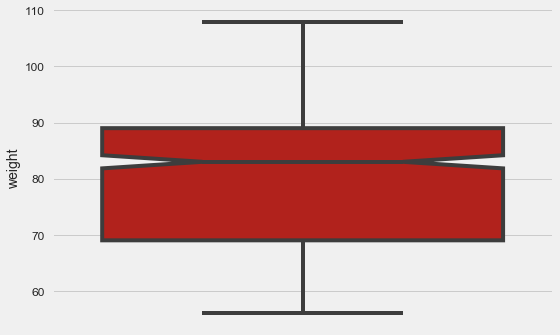

In [399]:
ax = sns.boxplot(df['weight'],orient='v',notch='True',color='r')

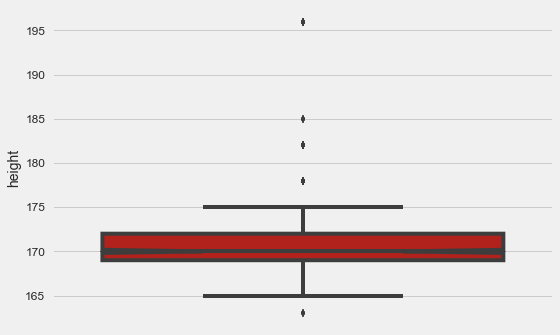

In [400]:
ax = sns.boxplot(df['height'],orient='v',notch='True',color='r')

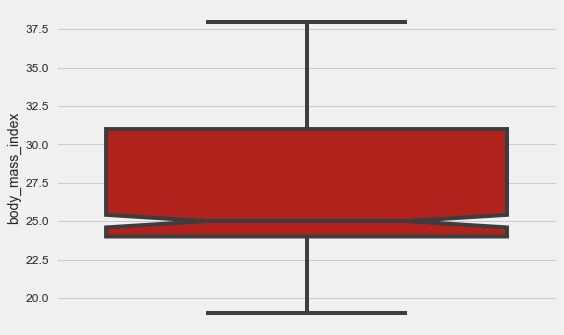

In [401]:
ax = sns.boxplot(df['body_mass_index'],orient='v',notch='True',color='r')

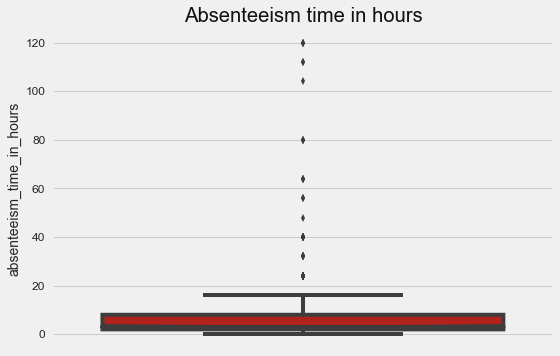

In [402]:
ax = sns.boxplot(df['absenteeism_time_in_hours'],orient='v',notch='True',color='r')
plt.title('Absenteeism time in hours')
plt.show()

In [403]:
# Looping over all continuou variables to detect and impute Outliers
for i in continuous_var:
    if i == 'absenteeism_time_in_hours':
        continue
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan


# Imputing missing values with KNN
knn = KNN(k=3)
df = knn.fit_transform(df)
df = pd.DataFrame(df,columns=columns)

#df = pd.DataFrame(KNN(k = 3), columns = df.columns)

# Checking if there is any missing value
df.isnull().sum().sum()

Imputing row 1/718 with 0 missing, elapsed time: 0.123
Imputing row 101/718 with 0 missing, elapsed time: 0.125
Imputing row 201/718 with 1 missing, elapsed time: 0.126
Imputing row 301/718 with 0 missing, elapsed time: 0.128
Imputing row 401/718 with 0 missing, elapsed time: 0.129
Imputing row 501/718 with 0 missing, elapsed time: 0.129
Imputing row 601/718 with 1 missing, elapsed time: 0.130
Imputing row 701/718 with 0 missing, elapsed time: 0.131


0

In [404]:
df.describe()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_per_day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,...,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,17.981894,19.418432,6.270195,3.899721,2.532033,219.943156,29.577747,12.472405,36.189851,267165.046587,...,0.045961,1.296657,1.011083,0.563592,0.071031,0.742340,79.059889,170.172181,26.698340,6.977716
std,11.035935,8.288079,3.440181,1.419519,1.105813,65.210423,14.787993,4.149299,6.077329,32252.992788,...,0.209547,0.678225,1.088586,0.495917,0.257055,1.310473,12.867657,1.815177,4.196589,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,165.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.750000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,171.941148,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,378.000000,52.000000,24.000000,53.000000,343253.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,175.000000,38.000000,120.000000


# Feature Selection 

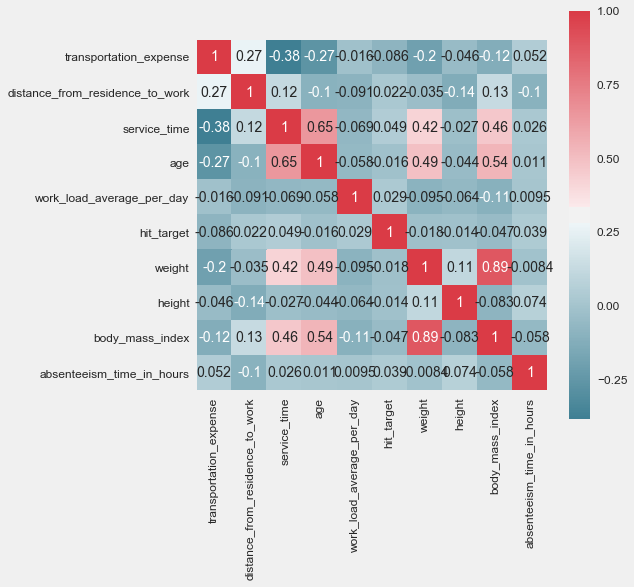

In [405]:
##Correlation analysis
df_corr = df.loc[:,continuous_var]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7,7))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

In [406]:
# BMI and weight have high correlation. one of them can be dropped.

# check for categorical variable selection for model

In [407]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average_per_day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

In [408]:
categorical_vars

['id',
 'reason_for_absence',
 'month_of_absence',
 'day_of_the_week',
 'seasons',
 'disciplinary_failure',
 'education',
 'son',
 'social_drinker',
 'social_smoker',
 'pet']

In [409]:
model = smf.ols(formula='absenteeism_time_in_hours ~ id', data=df)
results = model.fit()
print (results.summary())

                                OLS Regression Results                               
Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                 -0.001
Method:                        Least Squares   F-statistic:                    0.3142
Date:                       Mon, 05 Aug 2019   Prob (F-statistic):              0.575
Time:                               08:47:03   Log-Likelihood:                -2885.6
No. Observations:                        718   AIC:                             5775.
Df Residuals:                            716   BIC:                             5784.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [410]:
model = smf.ols(formula='absenteeism_time_in_hours ~ reason_for_absence', data=df)
results = model.fit()
print (results.summary())

                                OLS Regression Results                               
Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.042
Model:                                   OLS   Adj. R-squared:                  0.041
Method:                        Least Squares   F-statistic:                     31.48
Date:                       Mon, 05 Aug 2019   Prob (F-statistic):           2.88e-08
Time:                               08:47:03   Log-Likelihood:                -2870.4
No. Observations:                        718   AIC:                             5745.
Df Residuals:                            716   BIC:                             5754.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [411]:
model = smf.ols(formula='absenteeism_time_in_hours ~ month_of_absence', data=df)
results = model.fit()
print (results.summary())

                                OLS Regression Results                               
Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.001
Model:                                   OLS   Adj. R-squared:                 -0.001
Method:                        Least Squares   F-statistic:                    0.4754
Date:                       Mon, 05 Aug 2019   Prob (F-statistic):              0.491
Time:                               08:47:03   Log-Likelihood:                -2885.6
No. Observations:                        718   AIC:                             5775.
Df Residuals:                            716   BIC:                             5784.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [412]:
model = smf.ols(formula='absenteeism_time_in_hours ~ day_of_the_week', data=df)
results = model.fit()
print (results.summary())

                                OLS Regression Results                               
Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.014
Model:                                   OLS   Adj. R-squared:                  0.012
Method:                        Least Squares   F-statistic:                     9.959
Date:                       Mon, 05 Aug 2019   Prob (F-statistic):            0.00167
Time:                               08:47:04   Log-Likelihood:                -2880.8
No. Observations:                        718   AIC:                             5766.
Df Residuals:                            716   BIC:                             5775.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [413]:
model = smf.ols(formula='absenteeism_time_in_hours ~ seasons', data=df)
results = model.fit()
print (results.summary())

                                OLS Regression Results                               
Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                 -0.001
Method:                        Least Squares   F-statistic:                  0.001316
Date:                       Mon, 05 Aug 2019   Prob (F-statistic):              0.971
Time:                               08:47:04   Log-Likelihood:                -2885.8
No. Observations:                        718   AIC:                             5776.
Df Residuals:                            716   BIC:                             5785.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [414]:
model = smf.ols(formula='absenteeism_time_in_hours ~ disciplinary_failure', data=df)
results = model.fit()
print (results.summary())

                                OLS Regression Results                               
Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.003
Model:                                   OLS   Adj. R-squared:                  0.002
Method:                        Least Squares   F-statistic:                     2.130
Date:                       Mon, 05 Aug 2019   Prob (F-statistic):              0.145
Time:                               08:47:04   Log-Likelihood:                -2884.7
No. Observations:                        718   AIC:                             5773.
Df Residuals:                            716   BIC:                             5783.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [415]:
model = smf.ols(formula='absenteeism_time_in_hours ~ education', data=df)
results = model.fit()
print (results.summary())

                                OLS Regression Results                               
Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.002
Model:                                   OLS   Adj. R-squared:                  0.001
Method:                        Least Squares   F-statistic:                     1.557
Date:                       Mon, 05 Aug 2019   Prob (F-statistic):              0.213
Time:                               08:47:04   Log-Likelihood:                -2885.0
No. Observations:                        718   AIC:                             5774.
Df Residuals:                            716   BIC:                             5783.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [416]:
model = smf.ols(formula='absenteeism_time_in_hours ~ son', data=df)
results = model.fit()
print (results.summary())

                                OLS Regression Results                               
Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.015
Model:                                   OLS   Adj. R-squared:                  0.014
Method:                        Least Squares   F-statistic:                     10.84
Date:                       Mon, 05 Aug 2019   Prob (F-statistic):            0.00104
Time:                               08:47:04   Log-Likelihood:                -2880.4
No. Observations:                        718   AIC:                             5765.
Df Residuals:                            716   BIC:                             5774.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [417]:
model = smf.ols(formula='absenteeism_time_in_hours ~ social_drinker', data=df)
results = model.fit()
print (results.summary())

                                OLS Regression Results                               
Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.004
Model:                                   OLS   Adj. R-squared:                  0.003
Method:                        Least Squares   F-statistic:                     2.982
Date:                       Mon, 05 Aug 2019   Prob (F-statistic):             0.0846
Time:                               08:47:04   Log-Likelihood:                -2884.3
No. Observations:                        718   AIC:                             5773.
Df Residuals:                            716   BIC:                             5782.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [418]:
model = smf.ols(formula='absenteeism_time_in_hours ~ social_smoker', data=df)
results = model.fit()
print (results.summary())

                                OLS Regression Results                               
Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.002
Model:                                   OLS   Adj. R-squared:                  0.000
Method:                        Least Squares   F-statistic:                     1.335
Date:                       Mon, 05 Aug 2019   Prob (F-statistic):              0.248
Time:                               08:47:04   Log-Likelihood:                -2885.1
No. Observations:                        718   AIC:                             5774.
Df Residuals:                            716   BIC:                             5783.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [419]:
model = smf.ols(formula='absenteeism_time_in_hours ~ pet', data=df)
results = model.fit()
print (results.summary())

                                OLS Regression Results                               
Dep. Variable:     absenteeism_time_in_hours   R-squared:                       0.001
Model:                                   OLS   Adj. R-squared:                 -0.001
Method:                        Least Squares   F-statistic:                    0.5925
Date:                       Mon, 05 Aug 2019   Prob (F-statistic):              0.442
Time:                               08:47:04   Log-Likelihood:                -2885.5
No. Observations:                        718   AIC:                             5775.
Df Residuals:                            716   BIC:                             5784.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [420]:
# for p<0.05, we reject the Ho. Hence id,month_of_absence,day_of_the_week,disciplinary_failure,
# education,social_drinker,social_smoker, pet variables can be dropped

In [421]:
df = df.drop(columns=['body_mass_index','id','month_of_absence','day_of_the_week','disciplinary_failure',\
                      'education','social_drinker','social_smoker','pet'],axis=1)

In [422]:
df.describe()

,reason_for_absence,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_per_day,hit_target,son,weight,height,absenteeism_time_in_hours
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,19.418432,2.532033,219.943156,29.577747,12.472405,36.189851,267165.046587,94.940186,1.011083,79.059889,170.172181,6.977716
std,8.288079,1.105813,65.210423,14.787993,4.149299,6.077329,32252.992788,3.076533,1.088586,12.867657,1.815177,13.476962
min,0.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,87.000000,0.000000,56.000000,165.000000,0.000000
25%,13.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,69.000000,169.000000,2.000000
50%,23.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,1.000000,83.000000,170.000000,3.000000
75%,26.750000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,2.000000,89.000000,171.941148,8.000000
max,28.000000,4.000000,378.000000,52.000000,24.000000,53.000000,343253.000000,100.000000,4.000000,108.000000,175.000000,120.000000


In [423]:
df.isnull().sum()

reason_for_absence                 0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average_per_day          0
hit_target                         0
son                                0
weight                             0
height                             0
absenteeism_time_in_hours          0
dtype: int64

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 12 columns):
reason_for_absence                 718 non-null float64
seasons                            718 non-null float64
transportation_expense             718 non-null float64
distance_from_residence_to_work    718 non-null float64
service_time                       718 non-null float64
age                                718 non-null float64
work_load_average_per_day          718 non-null float64
hit_target                         718 non-null float64
son                                718 non-null float64
weight                             718 non-null float64
height                             718 non-null float64
absenteeism_time_in_hours          718 non-null float64
dtypes: float64(12)
memory usage: 67.4 KB


In [425]:
df.describe()

,reason_for_absence,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_per_day,hit_target,son,weight,height,absenteeism_time_in_hours
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,19.418432,2.532033,219.943156,29.577747,12.472405,36.189851,267165.046587,94.940186,1.011083,79.059889,170.172181,6.977716
std,8.288079,1.105813,65.210423,14.787993,4.149299,6.077329,32252.992788,3.076533,1.088586,12.867657,1.815177,13.476962
min,0.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,87.000000,0.000000,56.000000,165.000000,0.000000
25%,13.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,69.000000,169.000000,2.000000
50%,23.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,1.000000,83.000000,170.000000,3.000000
75%,26.750000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,2.000000,89.000000,171.941148,8.000000
max,28.000000,4.000000,378.000000,52.000000,24.000000,53.000000,343253.000000,100.000000,4.000000,108.000000,175.000000,120.000000


# Feature Engineering 

In [426]:
df['absenteeism_time_in_hours'].describe()

count    718.000000
mean       6.977716
std       13.476962
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: absenteeism_time_in_hours, dtype: float64

In [427]:
df['absenteeism_class'] = pd.cut(df['absenteeism_time_in_hours'],\
                                 bins=[1,2,6,121], labels=['CLASS1','CLASS2','CLASS3'])

In [428]:
df['absenteeism_class'].value_counts()

CLASS3    262
CLASS2    177
CLASS1    155
Name: absenteeism_class, dtype: int64

In [429]:
df['absenteeism_class'] = df['absenteeism_class'].replace(np.nan, 'CLASS1')

In [430]:
absent_class_frequency = df['absenteeism_class'].value_counts()

In [431]:
absent_class_frequency 

CLASS1    279
CLASS3    262
CLASS2    177
Name: absenteeism_class, dtype: int64

In [432]:
absent_class = df['absenteeism_class'].unique()

Text(0.5, 1.0, 'barplot of absent class')

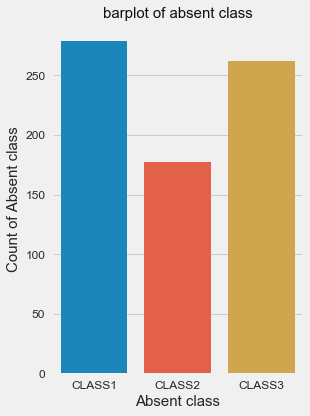

In [433]:
f, ax = plt.subplots(figsize=(4,6))
sns.barplot(x=absent_class_frequency.index, y=absent_class_frequency)
plt.xlabel('Absent class', fontsize=15)
plt.ylabel('Count of Absent class', fontsize=15)
plt.title('barplot of absent class', fontsize=15)

In [434]:
absent_class_frequency

CLASS1    279
CLASS3    262
CLASS2    177
Name: absenteeism_class, dtype: int64

In [435]:
df[['absenteeism_time_in_hours','absenteeism_class']].head()

,absenteeism_time_in_hours,absenteeism_class
0,4.0,CLASS2
1,0.0,CLASS1
2,2.0,CLASS1
3,4.0,CLASS2
4,2.0,CLASS1


In [436]:
df[['absenteeism_time_in_hours','absenteeism_class']].tail()

,absenteeism_time_in_hours,absenteeism_class
713,8.0,CLASS3
714,4.0,CLASS2
715,0.0,CLASS1
716,0.0,CLASS1
717,0.0,CLASS1


In [437]:
df =  df.drop(columns='absenteeism_time_in_hours', axis=1)

In [438]:
cleanup_class = {"absenteeism_class":     {"CLASS1": 1, "CLASS2": 2,"CLASS3": 3}}
df.replace(cleanup_class, inplace=True)

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 12 columns):
reason_for_absence                 718 non-null float64
seasons                            718 non-null float64
transportation_expense             718 non-null float64
distance_from_residence_to_work    718 non-null float64
service_time                       718 non-null float64
age                                718 non-null float64
work_load_average_per_day          718 non-null float64
hit_target                         718 non-null float64
son                                718 non-null float64
weight                             718 non-null float64
height                             718 non-null float64
absenteeism_class                  718 non-null int64
dtypes: float64(11), int64(1)
memory usage: 67.4 KB


In [440]:
df.isnull().any()

reason_for_absence                 False
seasons                            False
transportation_expense             False
distance_from_residence_to_work    False
service_time                       False
age                                False
work_load_average_per_day          False
hit_target                         False
son                                False
weight                             False
height                             False
absenteeism_class                  False
dtype: bool

In [441]:
df['absenteeism_class'] = df['absenteeism_class'].astype('float')

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 12 columns):
reason_for_absence                 718 non-null float64
seasons                            718 non-null float64
transportation_expense             718 non-null float64
distance_from_residence_to_work    718 non-null float64
service_time                       718 non-null float64
age                                718 non-null float64
work_load_average_per_day          718 non-null float64
hit_target                         718 non-null float64
son                                718 non-null float64
weight                             718 non-null float64
height                             718 non-null float64
absenteeism_class                  718 non-null float64
dtypes: float64(12)
memory usage: 67.4 KB


In [443]:
df.isnull().any()

reason_for_absence                 False
seasons                            False
transportation_expense             False
distance_from_residence_to_work    False
service_time                       False
age                                False
work_load_average_per_day          False
hit_target                         False
son                                False
weight                             False
height                             False
absenteeism_class                  False
dtype: bool

# Feature Scaling 

In [444]:
continuous_var = ['transportation_expense','distance_from_residence_to_work', 'service_time', 'age',\
                  'work_load_average_per_day', 'hit_target','weight', 'height']

In [445]:
# Since there is no normally distributed curve we will use Normalizationg for Feature Scalling
# #Normalization
for i in continuous_var:
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

In [446]:
df.head()

,reason_for_absence,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_per_day,hit_target,son,weight,height,absenteeism_class
0,26.0,1.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,2.0,0.653846,0.700000,2.0
1,0.0,1.0,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,1.0,0.807692,0.500001,1.0
2,23.0,1.0,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.0,0.634615,0.500000,1.0
3,7.0,1.0,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,2.0,0.230769,0.300000,2.0
4,23.0,1.0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,2.0,0.653846,0.700000,1.0


In [447]:
np.unique(df['absenteeism_class'],return_counts='True')

(array([1., 2., 3.]), array([279, 177, 262], dtype=int64))

# Evaluation Metrics for classification problems

# balanced_accuracy_score: The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets.
It is defined as the average of recall obtained on each class.
The best value is 1 and the worst value is 0 when adjusted=False.

# roc_curve: Compute Receiver operating characteristic (ROC)
Note: this implementation is restricted to the binary classification task.
sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)

# Log-Loss : Logarithmic loss
It measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. #  Logarithmic loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. Log loss increases as the predicted probability diverges from the actual label.


In [448]:
def print_error_metrics(y1,y2):
    #df_confusion = pd.crosstab(y1,y2,rownames=['Actual'], colnames=['Predicted'], margins=True)
    #plot_confusion_matrix(df_confusion)
    print("accuracy score : %.3f" % accuracy_score(y1,y2))
    #print("balanced accuracy score : %.3f" % balanced_accuracy_score(y1,y2))
#     confusion_matrix(y_test, y_pred,labels=np.unique(y1))
#     print(confusion_matrix)
    return None

In [449]:
X= df.drop(columns=['absenteeism_class'])
y= df['absenteeism_class']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2)

# Logistic Regression 

In [450]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='lbfgs',multi_class='auto')
lr_clf.fit(X_train, y_train)
y_pred_test = lr_clf.predict_proba(X_test)
y_pred_train = lr_clf.predict_proba(X_train)
y_pred = lr_clf.predict(X_test)

print("\n")
print("Logistic Regression Model Train log loss : %.3f" % log_loss(y_train.astype(float), y_pred_train)) 
print("Logistic Regression Model Test log loss : %.3f" % log_loss(y_test.astype(float), y_pred_test)) 
print_error_metrics(y_test,y_pred)


df_matrix = confusion_matrix(y_test, y_pred,labels=np.unique(y_test))
print("\nconfusion_matrix:")
print(df_matrix)

from sklearn.metrics import classification_report
target_names = ['CLASS1', 'CLASS2','CLASS3']
labels = [1,2,3]

print("\nclassification_report:>\n")
print(classification_report(y_test, y_pred,labels=labels, target_names=target_names))



Logistic Regression Model Train log loss : 0.963
Logistic Regression Model Test log loss : 1.025
accuracy score : 0.431

confusion_matrix:
[[38  1 13]
 [32  4  7]
 [28  1 20]]

classification_report:>

              precision    recall  f1-score   support

      CLASS1       0.39      0.73      0.51        52
      CLASS2       0.67      0.09      0.16        43
      CLASS3       0.50      0.41      0.45        49

   micro avg       0.43      0.43      0.43       144
   macro avg       0.52      0.41      0.37       144
weighted avg       0.51      0.43      0.38       144



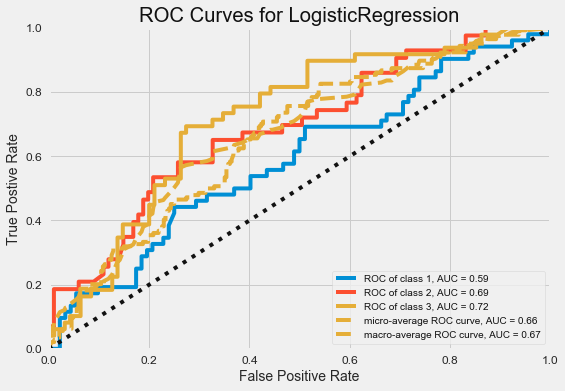

In [451]:
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(lr_clf, classes=['1','2','3'])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [452]:
#  log_loss is very high and AUC is low. Lets explore other models

# Naive Bayes

In [453]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred_test = NB_model.predict_proba(X_test)
y_pred_train = NB_model.predict_proba(X_train)
y_pred = NB_model.predict(X_test)

print("\n")
print("NB Model Train log loss : %.3f" % log_loss(y_train.astype(float), y_pred_train)) 
print("NB Model Test log loss : %.3f" % log_loss(y_test.astype(float), y_pred_test)) 
print("\n")

print_error_metrics(y_test,y_pred)
df_matrix = confusion_matrix(y_test, y_pred,labels=np.unique(y_test))
print("\nconfusion_matrix:")
print(df_matrix)

from sklearn.metrics import classification_report
target_names = ['CLASS1', 'CLASS2','CLASS3']
labels = [1,2,3]

print("\nclassification_report:>\n")
print(classification_report(y_test, y_pred,labels=labels, target_names=target_names))



NB Model Train log loss : 0.969
NB Model Test log loss : 1.052


accuracy score : 0.486

confusion_matrix:
[[35  9  8]
 [22 15  6]
 [24  5 20]]

classification_report:>

              precision    recall  f1-score   support

      CLASS1       0.43      0.67      0.53        52
      CLASS2       0.52      0.35      0.42        43
      CLASS3       0.59      0.41      0.48        49

   micro avg       0.49      0.49      0.49       144
   macro avg       0.51      0.48      0.47       144
weighted avg       0.51      0.49      0.48       144



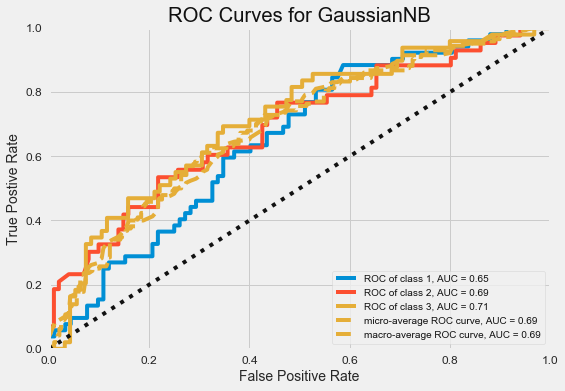

In [454]:
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(GaussianNB(), classes=['1','2','3'])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# DecisionTreeClassifier

In [455]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=2)
dt_clf.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# plot_decision_regions(X_combined, y_combined, clf=dt_clf)
# plt.show()

y_pred_test = dt_clf.predict_proba(X_test)
y_pred_train = dt_clf.predict_proba(X_train)

y_pred = dt_clf.predict(X_test)

print("DT Model Train log loss : %.3f" % log_loss(y_train.astype(float), y_pred_train)) 
print("DT Model Test log loss : %.3f" % log_loss(y_test.astype(float), y_pred_test)) 
print("\n")

export_graphviz(dt_clf,out_file='tree.dot',feature_names=X_test.columns)

print_error_metrics(y_test,y_pred)

df_matrix = confusion_matrix(y_test, y_pred,labels=np.unique(y_test))
print("\nconfusion_matrix:")
print(df_matrix)

from sklearn.metrics import classification_report
target_names = ['CLASS1', 'CLASS2','CLASS3']
labels = [1,2,3]

print("\nclassification_report:>\n")
print(classification_report(y_test, y_pred,labels=labels, target_names=target_names))

DT Model Train log loss : 0.770
DT Model Test log loss : 1.157


accuracy score : 0.590

confusion_matrix:
[[43  0  9]
 [30  4  9]
 [10  1 38]]

classification_report:>

              precision    recall  f1-score   support

      CLASS1       0.52      0.83      0.64        52
      CLASS2       0.80      0.09      0.17        43
      CLASS3       0.68      0.78      0.72        49

   micro avg       0.59      0.59      0.59       144
   macro avg       0.67      0.57      0.51       144
weighted avg       0.66      0.59      0.53       144



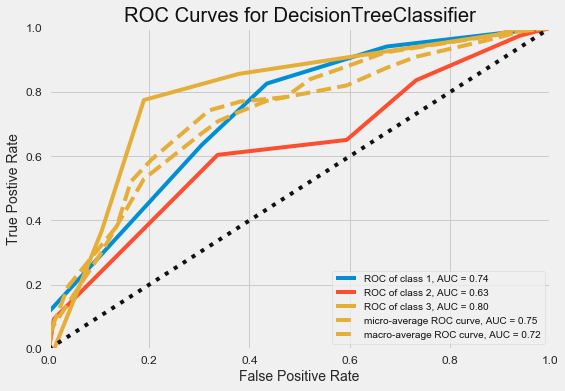

In [456]:
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(dt_clf, classes=['1','2','3'])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# RandomForestClassifier

In [457]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint

rf = RandomForestClassifier(n_estimators=100,random_state=42)
# Look at parameters used by our current forest
print('Hyper Parameters currently in use:\n')
pprint(rf.get_params())
rf.fit(X_train, y_train.astype(float))
# y_pred = rf.predict_proba(X_test)
# print("")
# print("Base RF Model log loss : %.3f" % log_loss(y_test, y_pred)) 

y_pred_test = rf.predict_proba(X_test)
y_pred_train = rf.predict_proba(X_train)

print("\n")

print("Base RF Model Train log loss : %.3f" % log_loss(y_train.astype(float), y_pred_train)) 
print("Base RF Model Test log loss : %.3f" % log_loss(y_test.astype(float), y_pred_test)) 

print("\n")
print_error_metrics(y_test,y_pred)

df_matrix = confusion_matrix(y_test, y_pred,labels=np.unique(y_test))
print("\nconfusion_matrix:")
print(df_matrix)

from sklearn.metrics import classification_report
target_names = ['CLASS1', 'CLASS2','CLASS3']
labels = [1,2,3]

print("\nclassification_report:>\n")
print(classification_report(y_test, y_pred,labels=labels, target_names=target_names))

Hyper Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Base RF Model Train log loss : 0.227
Base RF Model Test log loss : 0.883


accuracy score : 0.590

confusion_matrix:
[[43  0  9]
 [30  4  9]
 [10  1 38]]

classification_report:>

              precision    recall  f1-score   support

      CLASS1       0.52      0.83      0.64        52
      CLASS2       0.80      0.09      0.17        43
      CLASS3       0.68      0.78      0.72        49

   micro avg       0.59      0.59      0.59       144
   macro avg       0.67      0.57      0.51       144
weighted avg       0.66      0.59      0.53       144



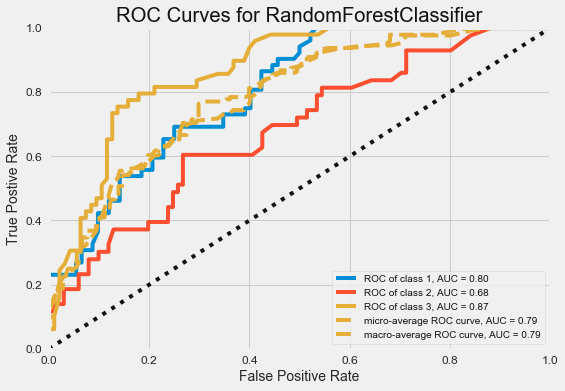

In [458]:
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(rf, classes=['1','2','3'])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

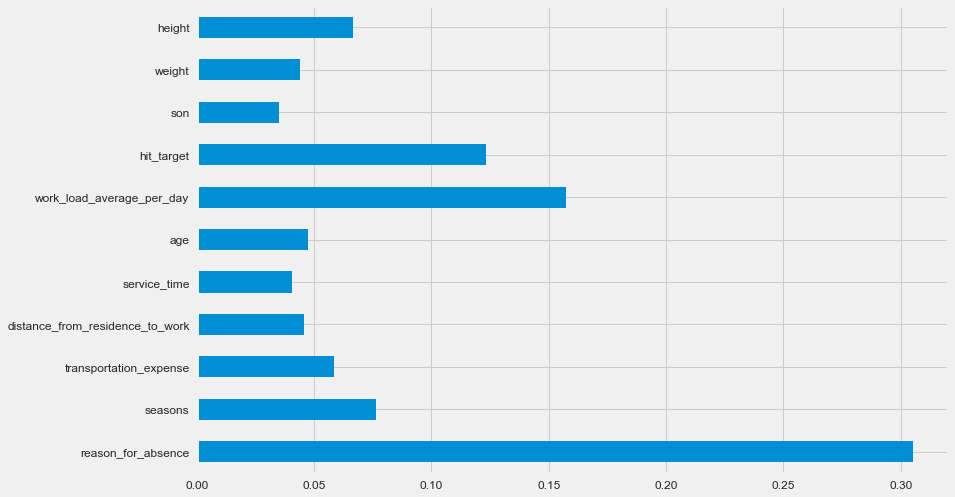

In [459]:
importances=pd.Series(rf.feature_importances_, index=X_train.columns)
importances.plot(kind='barh', figsize=(12,8))

In [460]:
# Reason_for_absence and trnasportation_expense are the important features 

In [461]:
# random forest hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from pprint import pprint

# First create the base model to tune
tuned_rf = RandomForestClassifier(random_state=42)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 5, num = 5)]
max_depth.append(None)

# Create the random grid
param_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth}

pprint(param_grid)

grid_search = GridSearchCV(tuned_rf, param_grid, cv=3, verbose=2, n_jobs = -1)

# Fit the random search model
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'max_depth': [1, 2, 3, 4, 5, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [50,
                  100,
                  150,
                  200,
                  250,
                  300,
                  350,
                  400,
                  450,
                  500,
                  550,
                  600,
                  650,
                  700,
                  750,
                  800,
                  850,
                  900,
                  950,
                  1000]}
Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.4min finished


{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 300}


In [462]:
# using parameters optained using Hyperparametertuning in RF model

In [463]:
tuned_rf = RandomForestClassifier(bootstrap=True,max_depth=4,max_features ='auto',n_estimators =700, random_state=42)
tuned_rf.fit(X_train, y_train)
y_pred_test = tuned_rf.predict_proba(X_test)
y_pred_train = tuned_rf.predict_proba(X_train)
y_pred = tuned_rf.predict(X_test)

print("Tuned RF Model Train log loss : %.3f" % log_loss(y_train, y_pred_train)) 
print("Tuned RF Model Test log loss : %.3f" % log_loss(y_test, y_pred_test)) 
print("\n")

print_error_metrics(y_test,y_pred)
df_matrix = confusion_matrix(y_test, y_pred,labels=np.unique(y_test))
print("\nconfusion_matrix:")
print(df_matrix)

from sklearn.metrics import classification_report
target_names = ['CLASS1', 'CLASS2','CLASS3']
labels = [1,2,3]

print("\nclassification_report:>\n")
print(classification_report(y_test, y_pred,labels=labels, target_names=target_names))

Tuned RF Model Train log loss : 0.751
Tuned RF Model Test log loss : 0.901


accuracy score : 0.597

confusion_matrix:
[[41  0 11]
 [29  5  9]
 [ 8  1 40]]

classification_report:>

              precision    recall  f1-score   support

      CLASS1       0.53      0.79      0.63        52
      CLASS2       0.83      0.12      0.20        43
      CLASS3       0.67      0.82      0.73        49

   micro avg       0.60      0.60      0.60       144
   macro avg       0.68      0.57      0.52       144
weighted avg       0.67      0.60      0.54       144



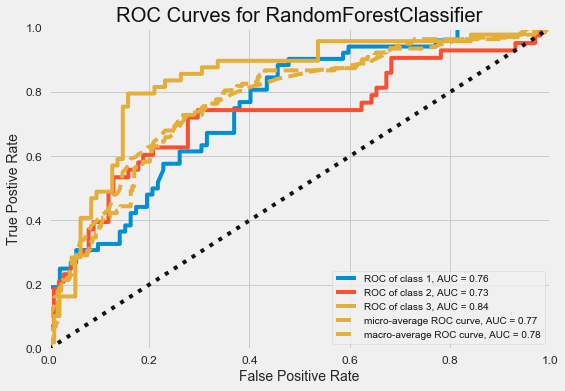

In [464]:
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(tuned_rf, classes=['1','2','3'])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# Ensemble  method

In [465]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='lbfgs',multi_class='auto',random_state=0)
rnd_clf = RandomForestClassifier(random_state=0)
svm_clf = SVC(gamma=.1, kernel='rbf', probability=True,random_state=0)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('rf', tuned_rf),
                                          ('nb', NB_model),('svc', svm_clf)],voting='soft')

voting_clf.fit(X_train, y_train)

y_pred_test = voting_clf.predict_proba(X_test)
y_pred_train = voting_clf.predict_proba(X_train)
y_pred = voting_clf.predict(X_test)

print("accuracy score : %.3f" % accuracy_score(y_test,y_pred))

print("Ensemble Model Train log loss : %.3f" % log_loss(y_train, y_pred_train)) 
print("Ensemble Model Test log loss : %.3f" % log_loss(y_test, y_pred_test)) 
print("\n")

#Let’s look at each classifier’s accuracy on the test set:
from sklearn.metrics import accuracy_score
for clf in (log_clf,NB_model,dt_clf, tuned_rf, svm_clf, voting_clf):
    clf.fit(X_train, y_train.astype(float))
    y_pred = clf.predict_proba(X_test)
    print(clf.__class__.__name__, log_loss(y_test.astype(float), y_pred))
    
    
#print_error_metrics(y_test,y_pred)
# df_matrix = confusion_matrix(y_test, y_pred,labels=np.unique(y_test))
# print("\nconfusion_matrix:")
# print(df_matrix)

# from sklearn.metrics import classification_report
# target_names = ['CLASS1', 'CLASS2','CLASS3']
# labels = [1,2,3]

# print("\nclassification_report:>\n")
# print(classification_report(y_test, y_pred,labels=labels, target_names=target_names))

# LogisticRegression 0.607500159966858
# GaussianNB 0.5812567451640172
# DecisionTreeClassifier 0.9270703648747217
# RandomForestClassifier 0.48340323753866976
# SVC 0.5689986960606733
# VotingClassifier 0.506900940069966

accuracy score : 0.583
Ensemble Model Train log loss : 0.795
Ensemble Model Test log loss : 0.914


LogisticRegression 1.025020291361908
GaussianNB 1.0517365963650844
DecisionTreeClassifier 1.1565061599287503
RandomForestClassifier 0.9012236244150623
SVC 0.9121929394780983
VotingClassifier 0.9138043886704674


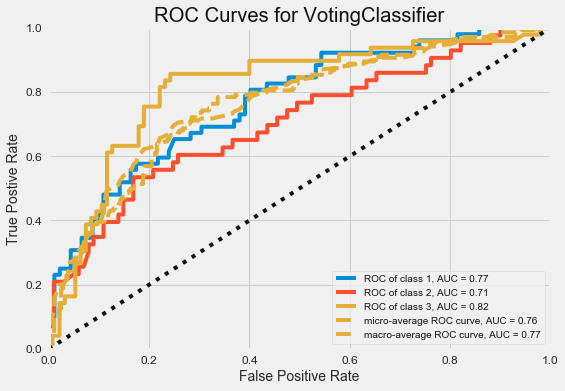

In [466]:
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(voting_clf, classes=['1','2','3'])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# XGBoost classifier

In [467]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold
# i=1 
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits)) 
#     xtr,xvl = X.loc[train_index],X.loc[test_index] 
#     ytr,yvl = y[train_index],y[test_index]     
#     model = XGBClassifier(n_estimators=50, max_depth=4)
#     model.fit(xtr, ytr)     
#     pred_test = model.predict(xvl) 
#     score = accuracy_score(yvl,pred_test)
#     print('accuracy_score',score)     
#     i+=1 
# # pred_test = model.predict(test) 
# # pred3=model.predict_proba(test)[:,1]


In [468]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50, max_depth=4)
xgb_model.fit(X_train, y_train)
y_pred_test = xgb_model.predict_proba(X_test)
y_pred_train = xgb_model.predict_proba(X_train)

y_pred = xgb_model.predict(X_test)

print("XGBoost Model Train log loss : %.3f" % log_loss(y_train, y_pred_train)) 
print("XGBoost Model Test log loss : %.3f" % log_loss(y_test, y_pred_test)) 
print("\n")

print_error_metrics(y_test,y_pred)

df_matrix = confusion_matrix(y_test, y_pred,labels=np.unique(y_test))
print("\nconfusion_matrix:")
print(df_matrix)

from sklearn.metrics import classification_report
target_names = ['CLASS1', 'CLASS2','CLASS3']
labels = [1,2,3]

print("\nclassification_report:>\n")
print(classification_report(y_test, y_pred,labels=labels, target_names=target_names))

XGBoost Model Train log loss : 0.526
XGBoost Model Test log loss : 0.817


accuracy score : 0.639

confusion_matrix:
[[44  2  6]
 [27  8  8]
 [ 5  4 40]]

classification_report:>

              precision    recall  f1-score   support

      CLASS1       0.58      0.85      0.69        52
      CLASS2       0.57      0.19      0.28        43
      CLASS3       0.74      0.82      0.78        49

   micro avg       0.64      0.64      0.64       144
   macro avg       0.63      0.62      0.58       144
weighted avg       0.63      0.64      0.60       144



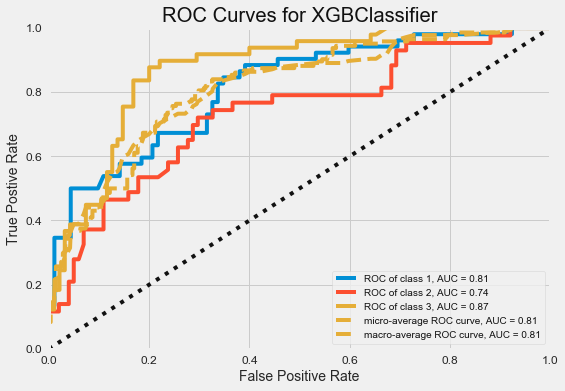

In [469]:
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(xgb_model, classes=['1','2','3'])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# Conclusion : As the test Logloss is lowest for XGBoost, we will chose the XGBoost for our model. 

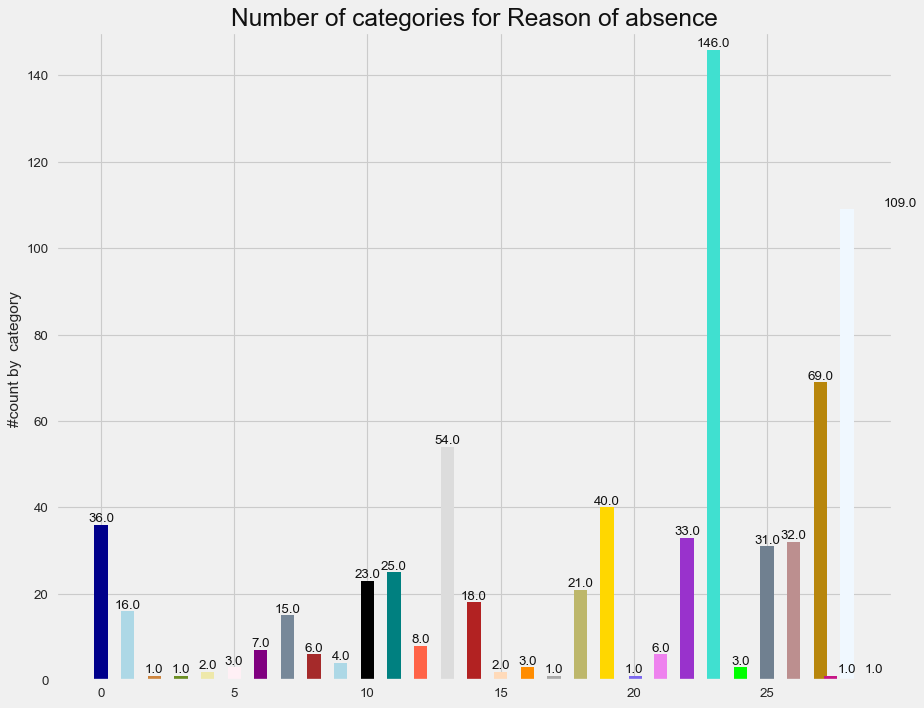

In [470]:
import random
# Prepare Data
df = df.groupby('reason_for_absence').size().reset_index(name='counts')
n = df['reason_for_absence'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(12,10), dpi= 80)
plt.bar(df['reason_for_absence'], df['counts'], color=c, width=.5)

df['counts']

for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom',\
             fontdict={'fontweight':500, 'size':12})

# Decoration
#plt.gca().set_xticklabels(df['Reason for absence'], rotation=60, horizontalalignment= 'right')
plt.title("Number of categories for Reason of absence", fontsize=22)
plt.ylabel('#count by  category ')
plt.ylim(0, 150)
plt.show()

#  medical consultation (23) & dental consultation (28) are most frequent.